In [1]:
!pip install qiskit
!pip -q install -U qiskit qiskit-aer
!pip install qiskit-ibm-runtime
!pip install 'qiskit[visualization]'
!pip -q install -U "qiskit[visualization]" qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=030d217b3ba72f788544ccd9a17459564821ea6f94c56e4d36b8d281723a2932
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

/tmp/ipython-input-2854244343.py:6: DeprecationWarning: The class ``qiskit.circuit.library.grover_operator.GroverOperator`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use qiskit.circuit.library.grover_operator instead.
  grover_op = GroverOperator(oracle)


Measurement counts with noise: {'00': 25, '10': 14, '01': 29, '11': 956}


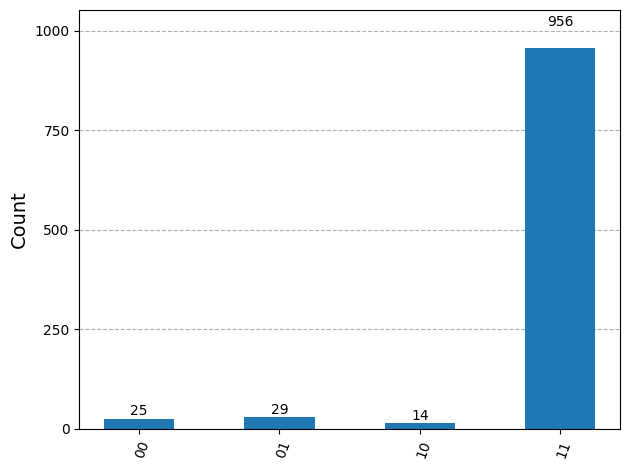

In [3]:
# --- 1. Define the Oracle ---
oracle = QuantumCircuit(2)
oracle.cz(0, 1)  # Marca el estado |11>

# --- 2. Create the Grover Operator ---
grover_op = GroverOperator(oracle)

# --- 3. Construct the Grover Circuit ---
qc = QuantumCircuit(2, 2)
qc.h([0, 1])                # Hadamard inicial
qc.compose(grover_op, inplace=True)
qc.measure([0, 1], [0, 1])  # Medición

# --- 4. Define a Noise Model (simula NISQ) ---
noise_model = NoiseModel()

# Depolarizing error para puertas de 1 y 2 qubits
error_1q = depolarizing_error(0.02, 1)  # 2% de error
error_2q = depolarizing_error(0.05, 2)  # 5% de error

# Añadimos error a todas las puertas de 1 y 2 qubits
noise_model.add_all_qubit_quantum_error(error_1q, ['h'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx', 'cz'])

# --- 5. Simulate with noise ---
simulator = AerSimulator(noise_model=noise_model)
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc)

# --- 6. Visualize results ---
print("Measurement counts with noise:", counts)
plot_histogram(counts)


/tmp/ipython-input-59928926.py:6: DeprecationWarning: The class ``qiskit.circuit.library.grover_operator.GroverOperator`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use qiskit.circuit.library.grover_operator instead.
  grover_op = GroverOperator(oracle)


Measurement counts: {'11': 1024}


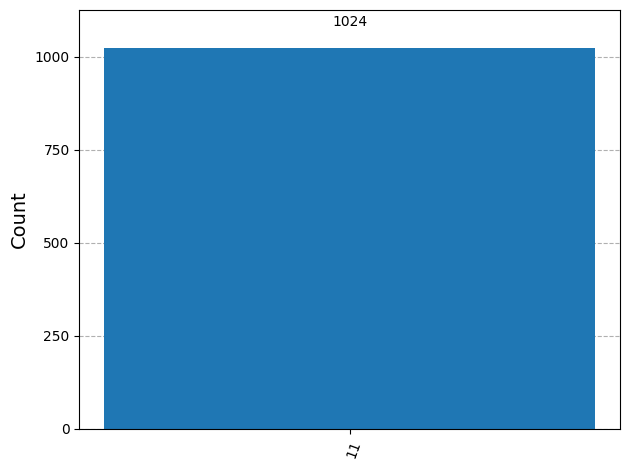

In [4]:
# 1. Define the Oracle
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

# 2. Create the Grover Operator
grover_op = GroverOperator(oracle)

# 3. Construct the Grover's Algorithm Circuit
qc = QuantumCircuit(2, 2)
qc.h([0, 1])                # Hadamard
qc.compose(grover_op, inplace=True)
qc.measure([0, 1], [0, 1])  # Medición

# 4. Simulate the Circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc)

# 5. Visualize the results
print("Measurement counts:", counts)
plot_histogram(counts)